In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read and Check Data

In [347]:
df=pd.read_csv("datasetler/Credit Score Classification Dataset.csv")

In [349]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [351]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [355]:
df.replace({

    "Female":0,
    "Male":1

},inplace=True)

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_13724\47404601.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [357]:
df["Gender"].unique()

array([0, 1], dtype=int64)

In [359]:
df["Education"].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [361]:
df.replace({
    "High School Diploma":0,
    "Associate's Degree":1,
    "Bachelor's Degree":2,
    "Master's Degree":3,
    'Doctorate':4
    
    
    

    
},inplace=True)

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_13724\2944062062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [363]:
df["Marital Status"].unique()

array(['Single', 'Married'], dtype=object)

In [365]:
df.replace({
    "Single":0,
    "Married":1


    
},inplace=True)

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_13724\581913387.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [367]:
df["Home Ownership"].unique()

array(['Rented', 'Owned'], dtype=object)

In [369]:
df.replace({
    "Rented":0,
    "Owned":1


    
},inplace=True)

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_13724\1737879086.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [371]:
creditMapping={
    "Low":0,
    "Average":1,
    "High":2


    
}

In [373]:
df["Credit Score"]=df["Credit Score"].map(creditMapping)

In [375]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,2,0,0,0,2
1,30,1,100000,3,1,2,1,2
2,35,0,75000,4,1,1,1,2
3,40,1,125000,0,0,0,1,2
4,45,0,100000,2,1,3,1,2


In [377]:
df.describe()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,37.975610,0.475610,83765.243902,2.079268,0.530488,0.652439,0.676829,1.597561
std,8.477289,0.500934,32457.306728,1.365593,0.500598,0.883346,0.469120,0.652692
min,25.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.750000,0.000000,57500.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,83750.000000,2.000000,1.000000,0.000000,1.000000,2.000000
75%,45.000000,1.000000,105000.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,53.000000,1.000000,162500.000000,4.000000,1.000000,3.000000,1.000000,2.000000


# Visualize Data

<Axes: >

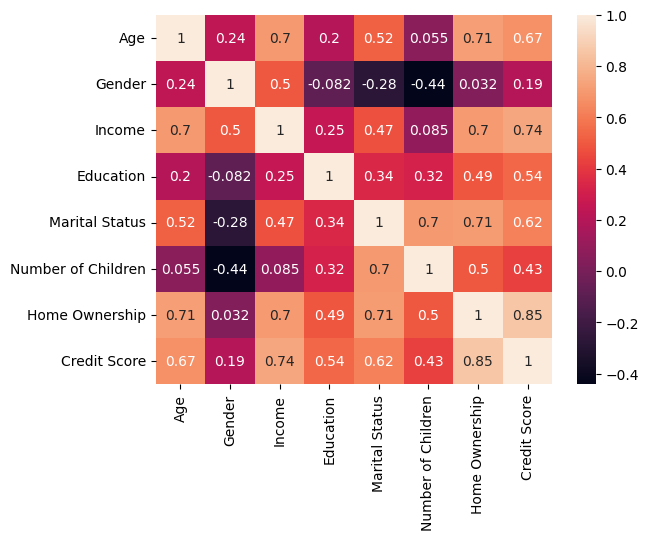

In [379]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Gender', ylabel='count'>

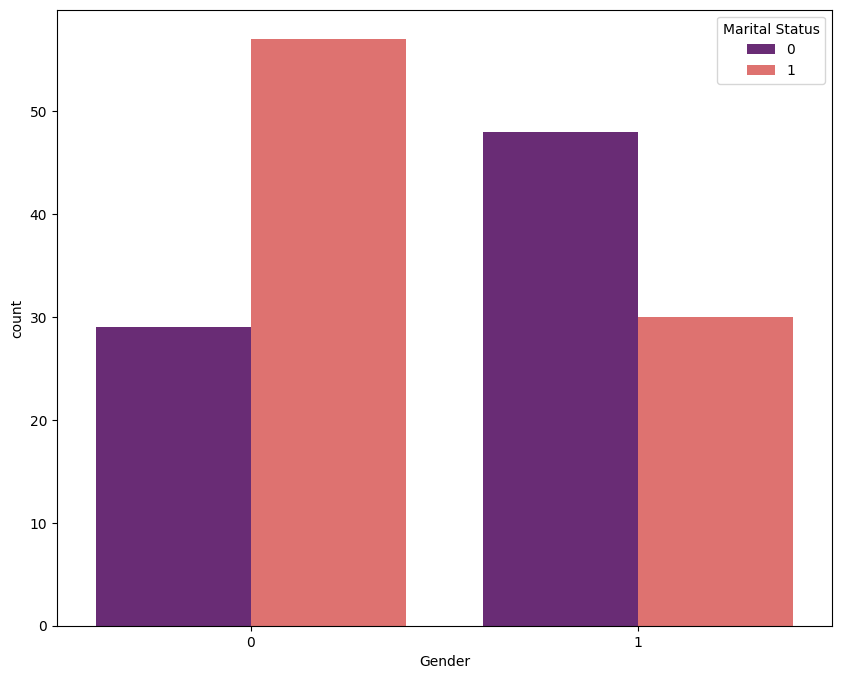

In [381]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=df,hue="Marital Status",palette="magma")

<Axes: xlabel='Education', ylabel='count'>

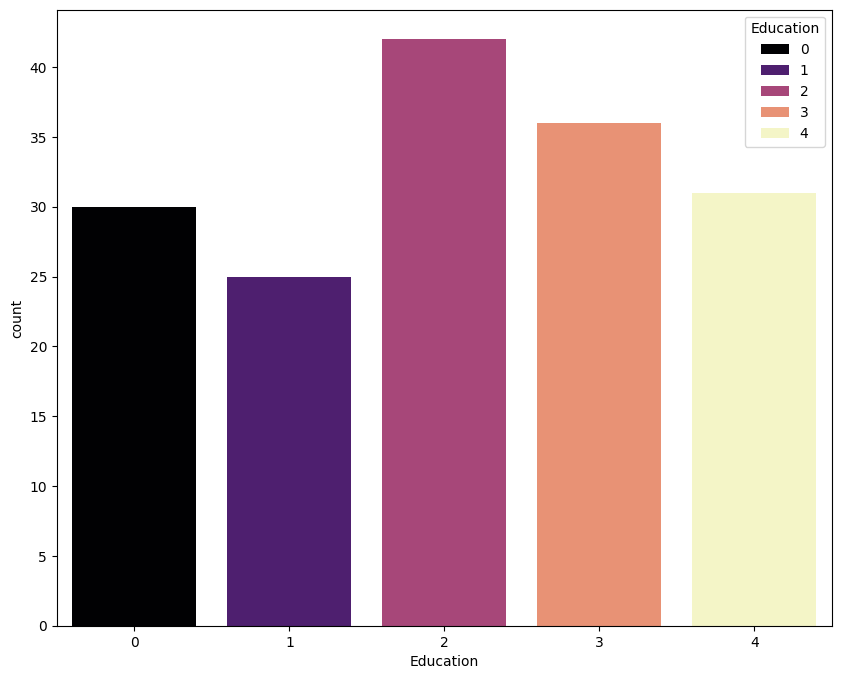

In [534]:
plt.figure(figsize=(10,8))
sns.countplot(x="Education",data=df,palette="magma",hue="Education")

''

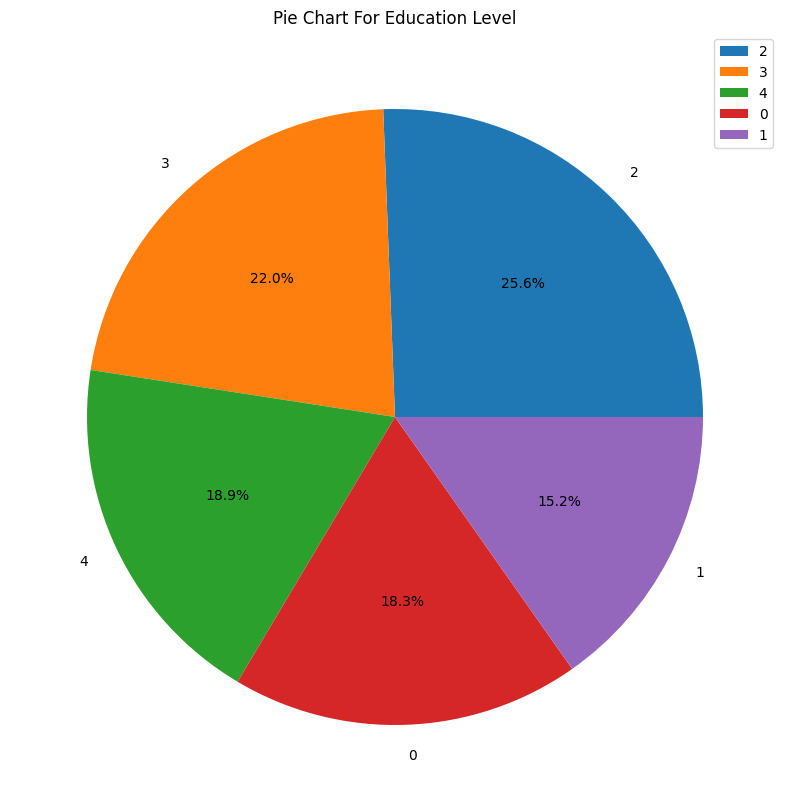

In [385]:
plt.figure(figsize=(10,10))
plt.pie(education,autopct="%1.1f%%",labels=etiketler)
plt.title("Pie Chart For Education Level")
plt.legend()
;

''

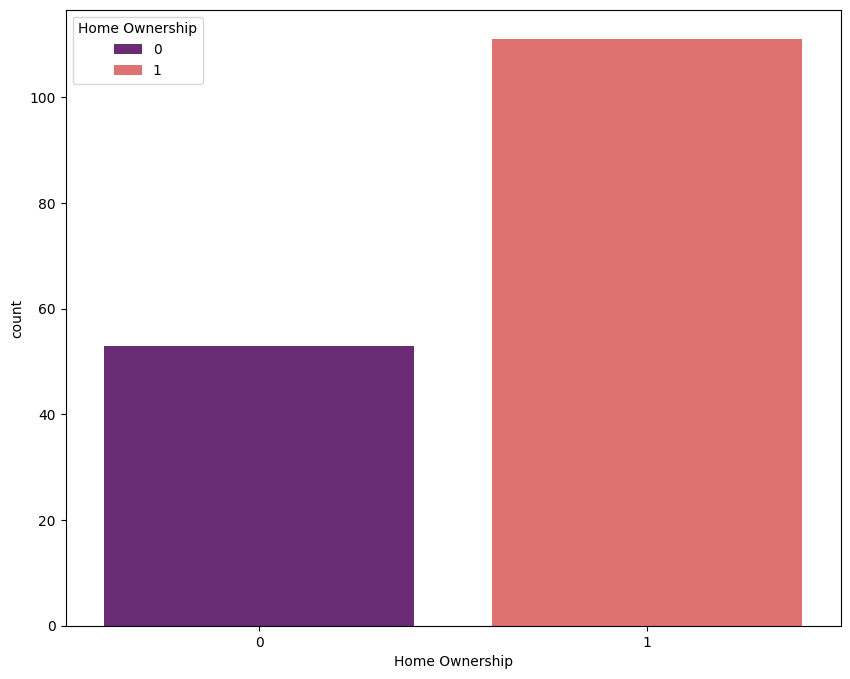

In [387]:
plt.figure(figsize=(10,8))
sns.countplot(x="Home Ownership",data=df,palette="magma",hue="Home Ownership")
;

In [389]:
ownerLabel=df["Home Ownership"].unique()

In [391]:
homeOwner=df["Home Ownership"].value_counts()

Text(0.5, 1.0, 'Pie Chart For Home Ownership')

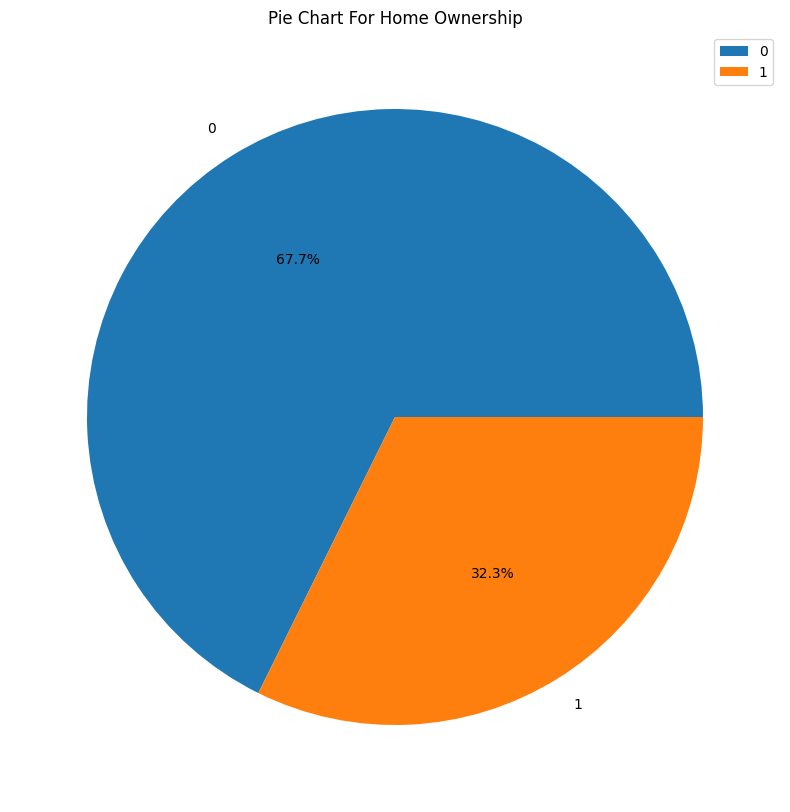

In [393]:
plt.figure(figsize=(10,10))
plt.pie(homeOwner,autopct="%1.1f%%",labels=ownerLabel)
plt.legend()
plt.title("Pie Chart For Home Ownership")

In [395]:
palet=sns.color_palette="magma"

In [397]:
etiketler=df["Education"].unique()

In [399]:
education=df["Education"].value_counts()

<Axes: xlabel='Age', ylabel='Income'>

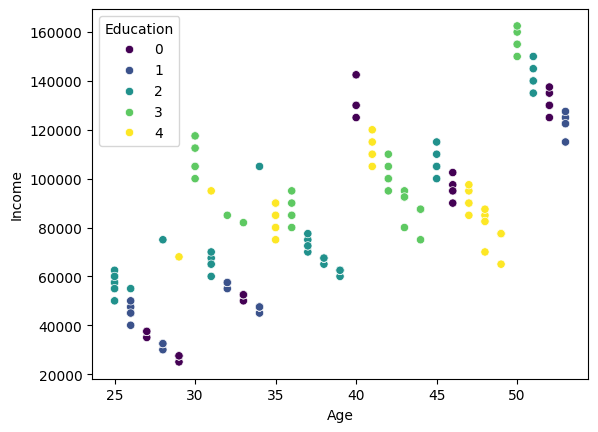

In [401]:
sns.scatterplot(data=df,y="Income",x="Age",palette="viridis",hue="Education")

In [403]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [405]:
children=df["Number of Children"].value_counts()

In [407]:
childenNumber=df["Number of Children"].unique()

''

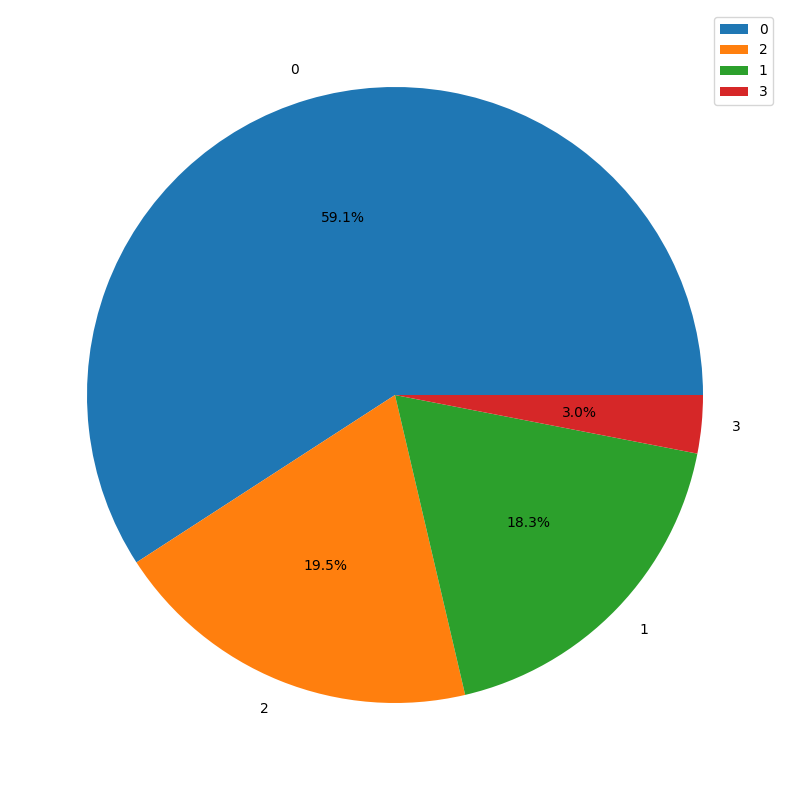

In [409]:
plt.figure(figsize=(10,10))
plt.pie(children,autopct="%1.1f%%",labels=childenNumber)
plt.legend()
;

# Preprocessing Data

In [411]:
X=df.drop("Credit Score",axis=1)

In [413]:
y=df["Credit Score"]

In [415]:
from sklearn.model_selection import train_test_split

In [417]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=28)

In [419]:
from sklearn.preprocessing import StandardScaler

In [421]:
scaler=StandardScaler()

In [423]:
X_train=scaler.fit_transform(X_train)

In [425]:
X_test=scaler.transform(X_test)

## Create Model

In [472]:
from sklearn.ensemble import AdaBoostClassifier

In [474]:
model=AdaBoostClassifier()

In [476]:
from sklearn.model_selection import GridSearchCV

In [616]:
params={
        'n_estimators': [3,5,10,20,40,50,70,100,200,300,400,500],
        'learning_rate': [0.1, 0.3]    
}

In [580]:
grid=GridSearchCV(model,param_grid=params,cv=5)

In [582]:
grid.fit(X_train,y_train)

C:\Users\MONSTER\anaconda3\envs\tfgpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\MONSTER\anaconda3\envs\tfgpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\MONSTER\anaconda3\envs\tfgpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\MONSTER\anaconda3\envs\tfgpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=22),
             param_grid={'learning_rate': [0.1, 0.3],
                         'n_estimators': [3, 5, 10, 20, 40, 50, 70, 100, 200,
                                          300, 400, 500]})

In [598]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [600]:
model=AdaBoostClassifier(n_estimators=10,learning_rate=0.1)

In [602]:
model.fit(X_train,y_train)

C:\Users\MONSTER\anaconda3\envs\tfgpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=10)

In [604]:
pred=model.predict(X_test)

In [606]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

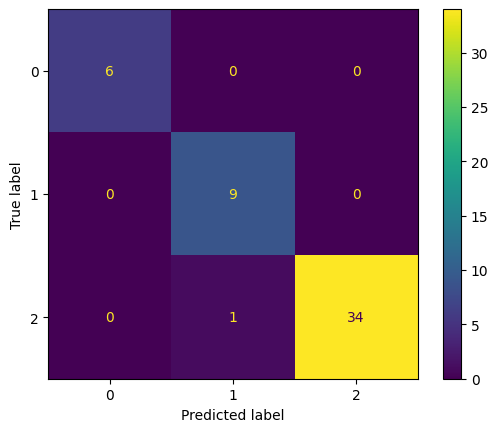

In [608]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [610]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.90      1.00      0.95         9
           2       1.00      0.97      0.99        35

    accuracy                           0.98        50
   macro avg       0.97      0.99      0.98        50
weighted avg       0.98      0.98      0.98        50

